In [91]:
import cv2
import numpy as np
import os
import glob

import matplotlib.pyplot as plt

### save files

In [92]:
from IPython.display import clear_output

In [93]:
def save_from_left():
    video = cv2.VideoCapture(1)
    _, frame = video.read()
    
    image_count = len(glob.glob('./images/*.jpg'))
    
    cv2.imwrite(f'images/{image_count + 1}.jpg', frame)
    plt.imshow(frame)
    plt.show()
    clear_output(wait=True)

In [94]:
import time

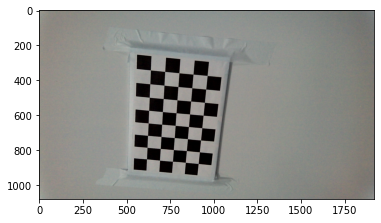

In [95]:
for _ in range(20):
    time.sleep(1)
    save_from_left()

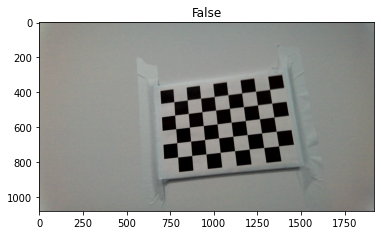

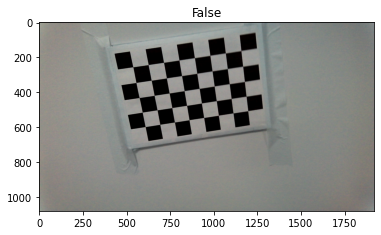

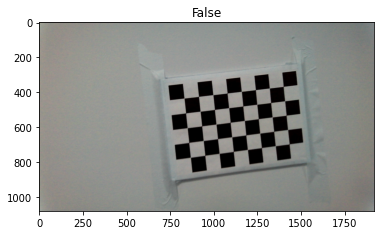

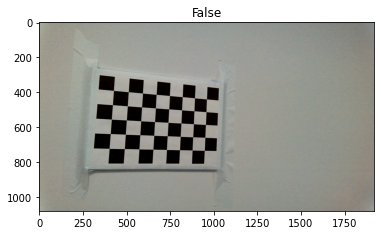

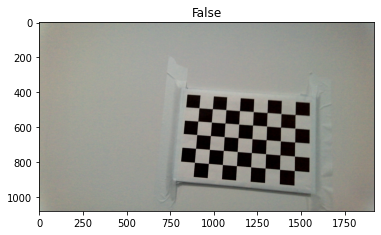

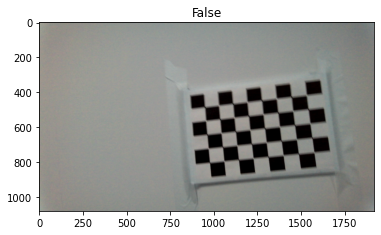

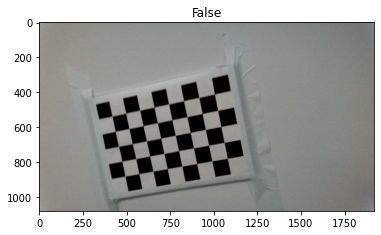

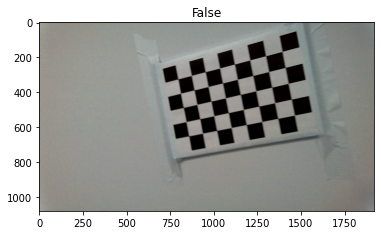

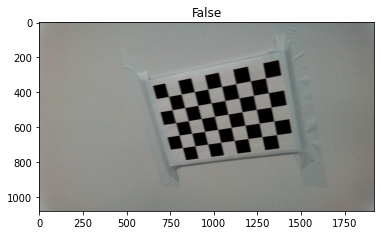

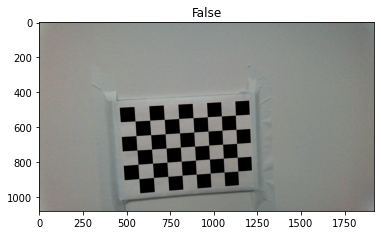

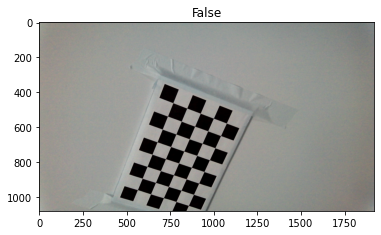

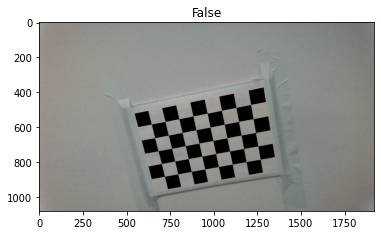

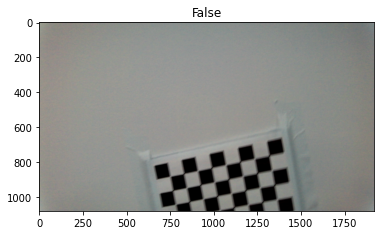

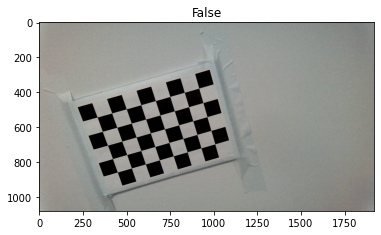

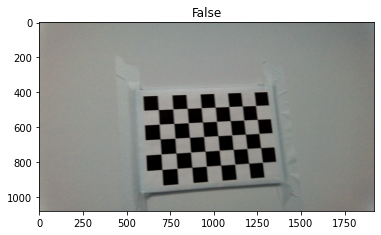

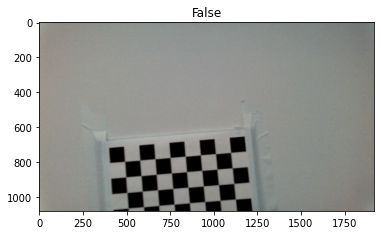

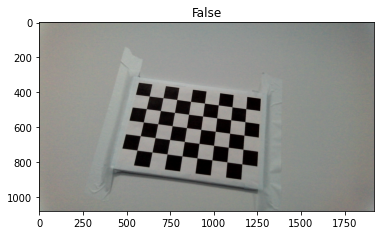

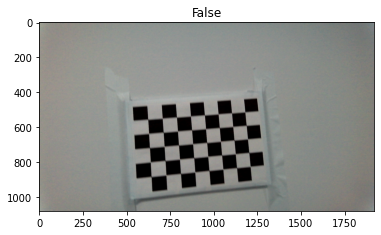

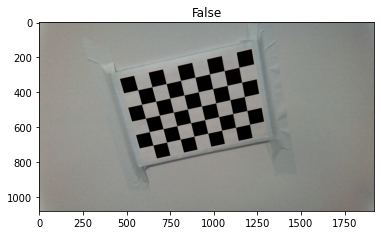

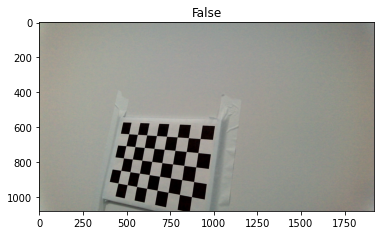

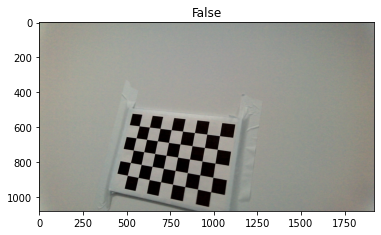

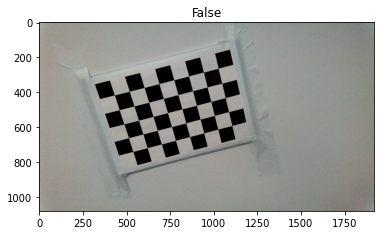

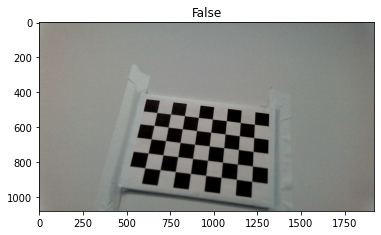

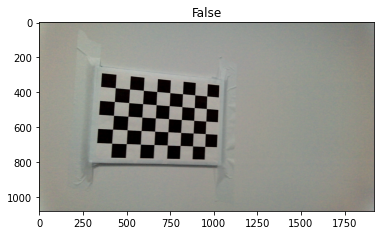

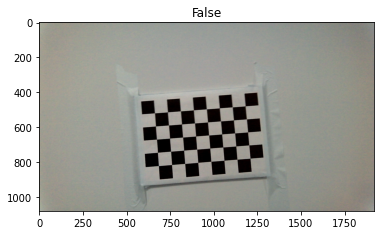

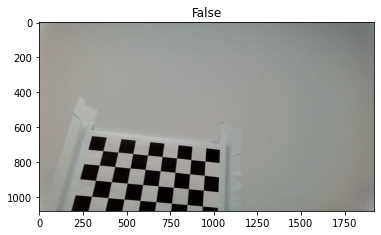

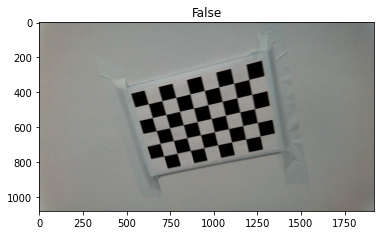

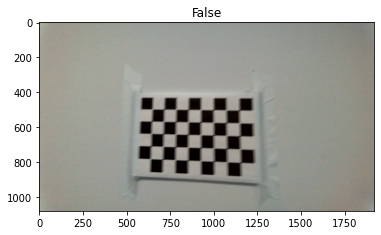

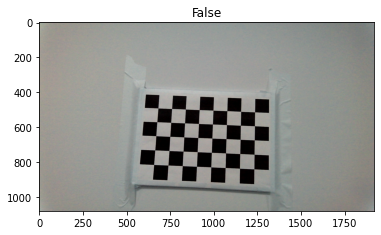

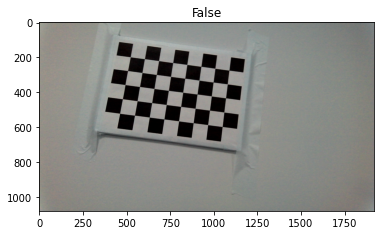

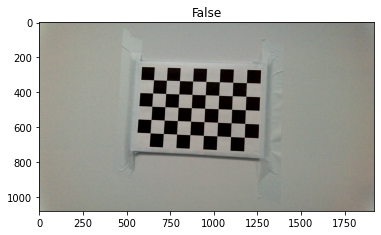

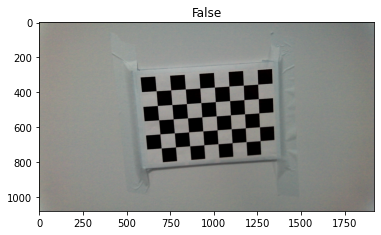

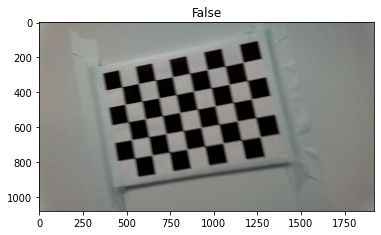

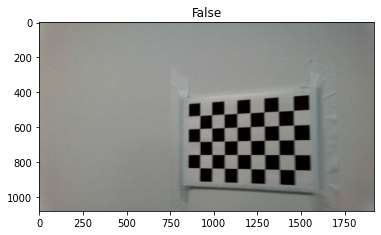

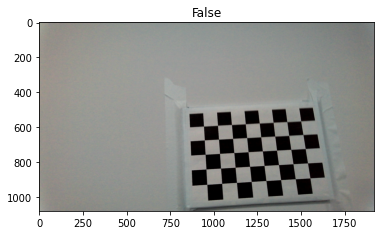

error: OpenCV(4.5.4) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [97]:
#!/usr/bin/env python



# Определение размеров шахматной доски
CHECKERBOARD = (6,9)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Создание вектора для хранения векторов трехмерных точек для каждого изображения шахматной доски
objpoints = []
# Создание вектора для хранения векторов 2D точек для каждого изображения шахматной доски
imgpoints = [] 


# Определение мировых координат для 3D точек
objp = np.zeros((1, CHECKERBOARD[0] * CHECKERBOARD[1], 3), np.float32)
objp[0,:,:2] = np.mgrid[0:CHECKERBOARD[0], 0:CHECKERBOARD[1]].T.reshape(-1, 2)
prev_img_shape = None

# Извлечение пути отдельного изображения, хранящегося в данном каталоге
images = glob.glob('./images/*.jpg')

for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # Найти углы шахматной доски
    # Если на изображении найдено нужное количество углов, тогда ret = true
    ret, corners = cv2.findChessboardCorners(
        gray, 
        CHECKERBOARD, 
        cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE
    )
    
    """
    Если желаемый номер угла обнаружен,
    уточняем координаты пикселей и отображаем
    их на изображениях шахматной доски
    """
    if ret == True:
        objpoints.append(objp)
        # уточнение координат пикселей для заданных 2d точек.
        corners2 = cv2.cornerSubPix(gray, corners, (11,11), (-1,-1), criteria)
        
        imgpoints.append(corners2)

        # Нарисовать и отобразить углы
        img = cv2.drawChessboardCorners(img, CHECKERBOARD, corners2, ret)
    
    plt.title(ret)
    plt.imshow(img)
    plt.show()
    

h,w = img.shape[:2]

"""
Выполнение калибровки камеры с помощью
Передача значения известных трехмерных точек (объектов)
и соответствующие пиксельные координаты
обнаруженные углы (imgpoints)
"""
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

print("Camera matrix : \n")
print(mtx)
print("dist : \n")
print(dist)
print("rvecs : \n")
print(rvecs)
print("tvecs : \n")
print(tvecs)